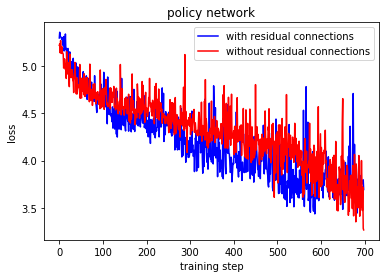

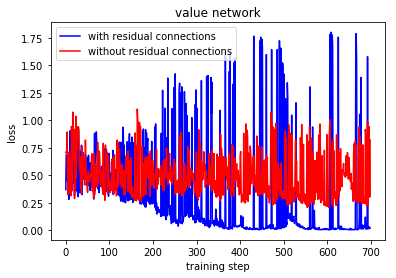

In [5]:
### Figure 5

import numpy as np 
from matplotlib import pyplot as plt

policyloss_res_list=np.load('./saved_models/policyloss_res_list.npy')
policyloss_nonres_list=np.load('./saved_models/policyloss_nonres_list.npy')
valueloss_res_list=np.load('./saved_models/valueloss_res_list.npy')
valueloss_nonres_list=np.load('./saved_models/valueloss_nonres_list.npy')
step_list=np.linspace(0,len(policyloss_res_list)-1,len(policyloss_res_list))

plt.figure()
plt.plot(step_list, policyloss_res_list, color='blue', label='with residual connections')
plt.plot(step_list,policyloss_nonres_list, color='red', label='without residual connections')
plt.legend()
plt.title('policy network')
plt.xlabel('training step')
plt.ylabel('loss')
plt.show()

plt.figure()
plt.plot(step_list, valueloss_res_list, color='blue', label='with residual connections')
plt.plot(step_list,valueloss_nonres_list, color='red', label='without residual connections')
plt.legend()
plt.title('value network')
plt.xlabel('training step')
plt.ylabel('loss')
plt.show()


0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
finished


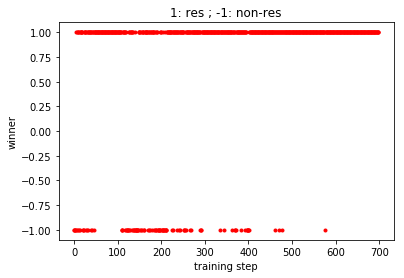

In [26]:
## Figure 6

import numpy as np 
from matplotlib import pyplot as plt

args={}

args['RowNum']=16
args['ColNum']=16
args['TileNum_Win']=5
args['conv_num_filters']=3
args['conv_kernel_size']=3
args['lr']=1e-3
args['search_num']=100
args['c_puct']=5

from Env import GomokuEnv 
from ResidualNetwork import GomokuResNet 
from RLmodel import RL 
from NonResidualNetwork import GomokuNonResNet


winner_list=[]

for step in range(699):
    
    if step%10==0:
        print(step)
        
    env=GomokuEnv(args)
    res_net=GomokuResNet(env, args)
    nonres_net=GomokuNonResNet(env, args)
    
    board, player = env.get_initial_state()
    filename='%s' %step
    res_net.load_model(filename)
    nonres_net.load_model(filename)
    
    while True:
        
        policy, _=res_net.predict(board, player)
        available_policies=[]
        available_actions=[]
        for k1 in range(args['RowNum']):
            for k2 in range(args['ColNum']):
                if board[k1][k2]==0:
                    action=k1*args['ColNum']+k2
                    available_actions.append(action)
                    available_policies.append(policy[action])
        index=np.argmax(available_policies)
        action=available_actions[index]
        next_board, next_player=env.next_state(board, action, player)
        winner=env.is_terminal_state(next_board, action, player)
        if winner is not None:
            winner_list.append(winner)
            break
        player=next_player
        board=next_board
        
        policy, _=nonres_net.predict(board, player)
        available_policies=[]
        available_actions=[]
        for k1 in range(args['RowNum']):
            for k2 in range(args['ColNum']):
                if board[k1][k2]==0:
                    action=k1*args['ColNum']+k2
                    available_actions.append(action)
                    available_policies.append(policy[action])
        index=np.argmax(available_policies)
        action=available_actions[index]
        next_board, next_player=env.next_state(board, action, player)
        winner=env.is_terminal_state(next_board, action, player)
        if winner is not None:
            winner_list.append(winner)
            break
        player=next_player
        board=next_board
        
np.save('./saved_models/winner_list', winner_list)
print('finished')
steplist=np.linspace(0, len(winner_list)-1, len(winner_list))
from matplotlib import pyplot as plt


step_list=np.linspace(0, len(winner_list)-1, len(winner_list))

plt.figure()
plt.plot(step_list, winner_list,'r.')
plt.xlabel('training step')
plt.ylabel('winner')
plt.title('1: res ; -1: non-res')
plt.show()
        
        
        
        
                    
        
        
        
    
    

